In [469]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.computational_tools import remesh, select_LatLon, L1_error
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read all experiments in the folder. Concatenete collections with "+" operator, which concatenate dictionary of experiments.

In [266]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')# +\
     #CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4', additional_subfolder='output')

In [548]:
ds.remesh('R64', 'R2')
ds.remesh('R64', 'R4')
ds.remesh('R64', 'R8')
ds.remesh('R64', 'R16')
ds.remesh('R64', 'R32')

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8
Experiment R64 coarsegrained to R16 is created. Its identificator=R64_R16
Experiment R64 coarsegrained to R32 is created. Its identificator=R64_R32


In [269]:
exps = ['R64_R2', 'R64_R4', 'R64_R8', 'R64']
len(ds.exps)

9

# Precompute statistics, which are cached in netcdf files

# Manually delete all cache files and compute them again

In [586]:
%%time
ds.compute_statistics(recompute=True)

Removing cache file /home/pp2681/ocean-tools/cache/KE_spectrum_R16.nc
Calculating value of KE_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_spectrum_R16.nc
Calculating value of KE_spectrum_global
Saving result to /home/pp2681/ocean-tools/cache/KE_spectrum_global_R16.nc
Removing cache file /home/pp2681/ocean-tools/cache/KE_R16.nc
Calculating value of KE
Saving result to /home/pp2681/ocean-tools/cache/KE_R16.nc
Removing cache file /home/pp2681/ocean-tools/cache/KE_spectrum_R2.nc
Calculating value of KE_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_spectrum_R2.nc
Calculating value of KE_spectrum_global
Saving result to /home/pp2681/ocean-tools/cache/KE_spectrum_global_R2.nc
Removing cache file /home/pp2681/ocean-tools/cache/KE_R2.nc
Calculating value of KE
Saving result to /home/pp2681/ocean-tools/cache/KE_R2.nc
Calculating value of KE_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_spectrum_R32.nc
Calculating value of KE_spectrum_global
Saving resu

# Check that all cache files exist

In [569]:
%%time
ds.compute_statistics(recompute=False)

Reading file /home/pp2681/ocean-tools/cache/KE_R16.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R16.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_R16.nc
Returning cached value of KE_spectrum_global
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R16.nc
Returning cached value of KE_spectrum_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_mean_R16.nc
Returning cached value of KE_spectrum_global_mean
Calculating value of KE_time_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_time_spectrum_R16.nc
Calculating value of ssh_mean
Saving result to /home/pp2681/ocean-tools/cache/ssh_mean_R16.nc
Calculating value of ssh_var
Saving result to /home/pp2681/ocean-tools/cache/ssh_var_R16.nc
Calculating value of u_mean
Saving result to /home/pp2681/ocean-tools/cache/u_mean_R16.nc
Calculating value of v_mean
Saving result to /home/pp2681/ocean-tools/cache/v_m

Saving result to /home/pp2681/ocean-tools/cache/KE_time_spectrum_R64_R4.nc
Reading file /home/pp2681/ocean-tools/cache/ssh_mean_R64_R4.nc
Returning cached value of ssh_mean
Reading file /home/pp2681/ocean-tools/cache/ssh_var_R64_R4.nc
Returning cached value of ssh_var
Reading file /home/pp2681/ocean-tools/cache/u_mean_R64_R4.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R64_R4.nc
Returning cached value of v_mean
Reading file /home/pp2681/ocean-tools/cache/KE_series_R64_R4.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_R64_R8.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R64_R8.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_R64_R8.nc
Returning cached value of KE_spectrum_global
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R64_R8.nc
Returning cached value of KE_spectrum_mean
Reading file /home/pp

# Access to cached on disk properties

In [590]:
%time ds['R64'].KE_spectrum_global

Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_R64.nc
Returning cached value of KE_spectrum_global
CPU times: user 2.59 ms, sys: 1.5 ms, total: 4.09 ms
Wall time: 3.77 ms


<xarray.DataArray 'KE_spectrum_global' (Time: 243, zl: 2, freq_r: 387)>
dask.array<open_dataset-3341842104a5f2ccd21372e7bd6e8cbaKE_spectrum_global, shape=(243, 2, 387), dtype=float64, chunksize=(1, 1, 387), chunktype=numpy.ndarray>
Coordinates:
  * freq_r   (freq_r) float64 3.328e-06 7.671e-06 ... 0.001795 0.001799
  * Time     (Time) float64 30.0 60.0 90.0 120.0 ... 7.23e+03 7.26e+03 7.29e+03
  * zl       (zl) float64 1.035e+03 1.036e+03

# Basic snapshots plotting

CPU times: user 684 ms, sys: 157 ms, total: 840 ms
Wall time: 977 ms


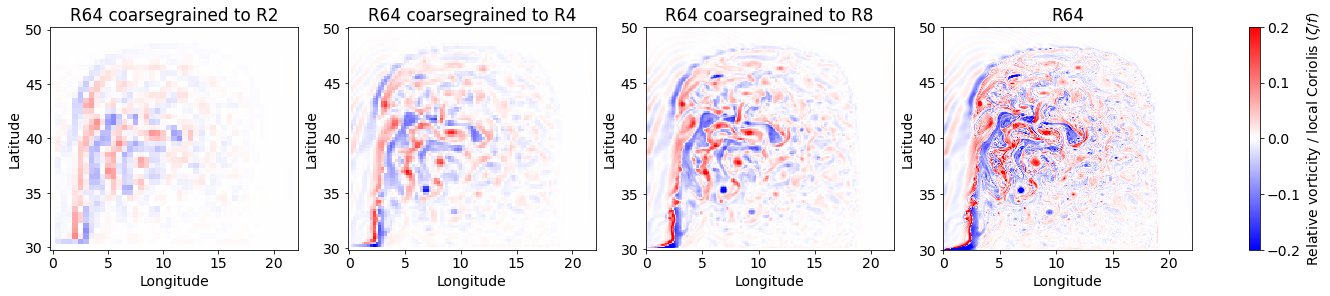

In [270]:
%%time
fig, ax = ds.get_axes(nfig=4,ncol=4)
ds.plot_RV(exps,ax=ax);

CPU times: user 547 ms, sys: 55.5 ms, total: 603 ms
Wall time: 653 ms


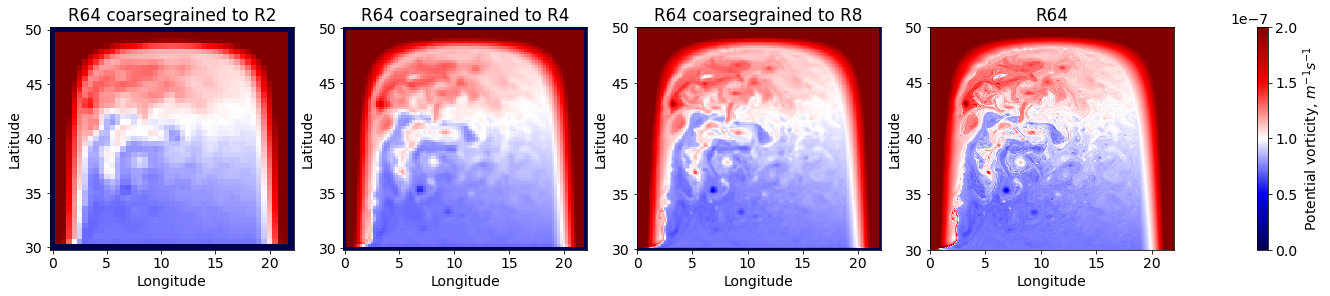

In [271]:
%%time
fig, ax = ds.get_axes(nfig=4,ncol=4)
ds.plot_PV(exps,ax=ax);

Calculating value of KE
Saving result to /home/pp2681/ocean-tools/cache/KE_R64_R2.nc
Reading file /home/pp2681/ocean-tools/cache/KE_R64_R4.nc
Returning cached value of KE
Calculating value of KE
Saving result to /home/pp2681/ocean-tools/cache/KE_R64_R8.nc
Reading file /home/pp2681/ocean-tools/cache/KE_R64.nc
Returning cached value of KE
CPU times: user 46.8 s, sys: 12.5 s, total: 59.3 s
Wall time: 7.77 s


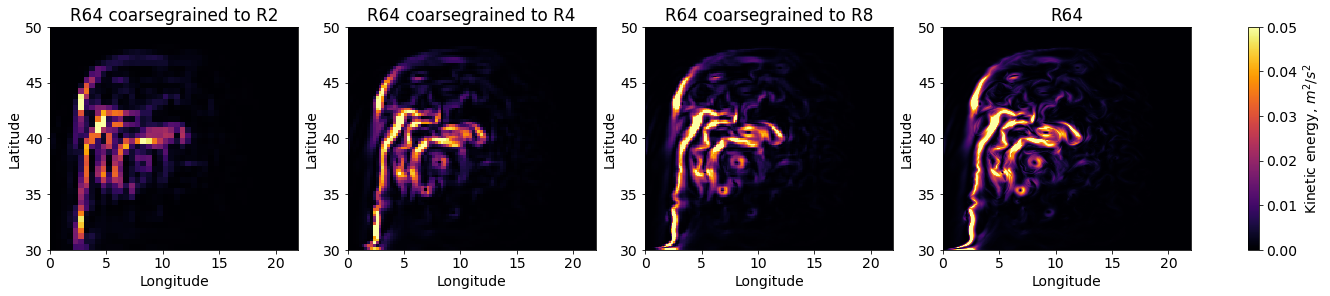

In [272]:
%%time
fig, ax = ds.get_axes(nfig=4,ncol=4)
ds.plot_KE(exps,ax=ax);

# Building of movies

In [99]:
%%time
animate_function = ds.animate(ds.plot_PV, nfig=4, ncol=4, videoname='PV.mp4')
animate_function(exps);

CPU times: user 23.6 s, sys: 308 ms, total: 23.9 s
Wall time: 24.3 s


'PV.mp4'

In [100]:
%%time
animate_function = ds.animate(ds.plot_KE, nfig=4, ncol=4, videoname='KE.mp4')
animate_function(exps);

CPU times: user 30.3 s, sys: 609 ms, total: 30.9 s
Wall time: 29.1 s


'KE.mp4'

# Build custom figure layout with "get_axes"

Reading file /home/pp2681/ocean-tools/cache/KE_R64_R2.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_R64_R4.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_R64_R8.nc
Returning cached value of KE
CPU times: user 1.03 s, sys: 21.3 ms, total: 1.05 s
Wall time: 1.03 s


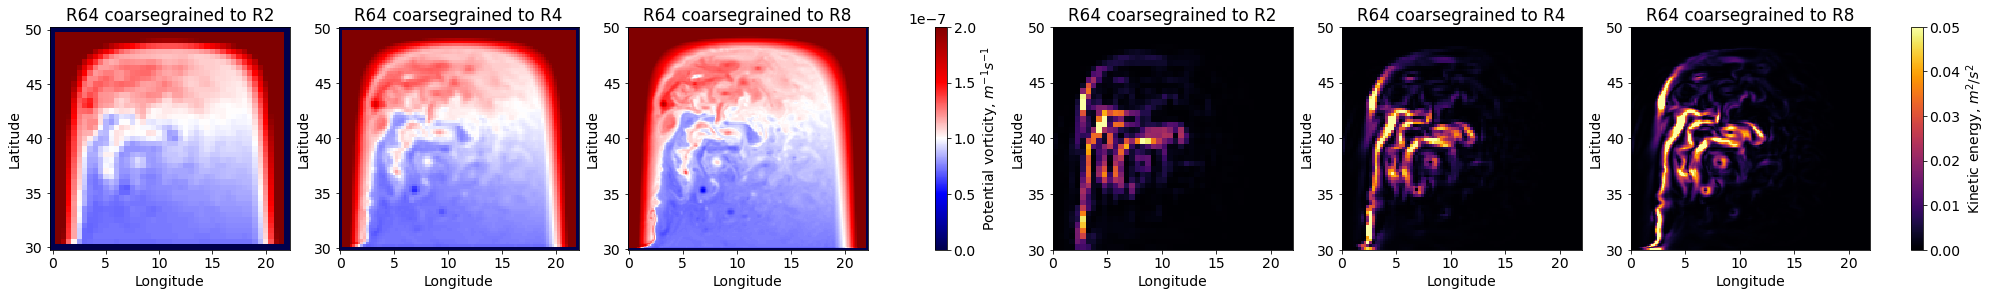

In [273]:
%%time
fig, ax = ds.get_axes(nfig=6, ncol=6)
ds.plot_PV(exps[0:3], ax=ax[:3]);
ds.plot_KE(exps[0:3], ax=ax[3:]);

# Statistical tools. Spectral analysis

Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R2.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R4.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R8.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R16.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R32.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R64.nc
Returning cached value of KE_spectrum


Text(0.5, 0.98, 'Total KE spatial spectrum')

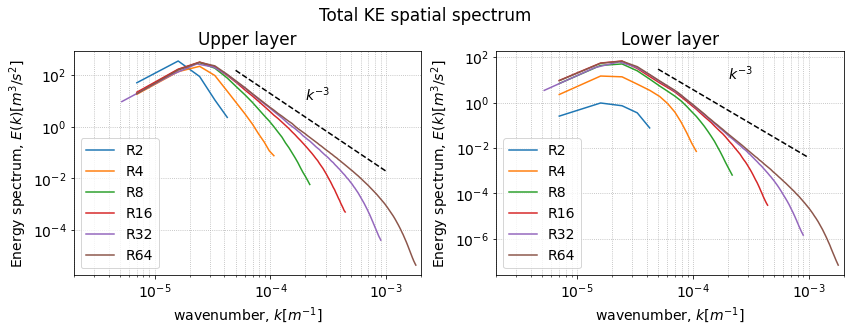

In [274]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3, size=4.5)
ds.plot_KE_spectrum(['R2', 'R4', 'R8', 'R16', 'R32', 'R64'],key='KE_spectrum', ax=ax);
plt.suptitle('Total KE spatial spectrum')

Reading file /home/pp2681/ocean-tools/cache/EKE_spectrum_R2.nc
Returning cached value of EKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/EKE_spectrum_R4.nc
Returning cached value of EKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/EKE_spectrum_R8.nc
Returning cached value of EKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/EKE_spectrum_R16.nc
Returning cached value of EKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/EKE_spectrum_R32.nc
Returning cached value of EKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/EKE_spectrum_R64.nc
Returning cached value of EKE_spectrum


Text(0.5, 0.98, 'EKE spatial spectrum')

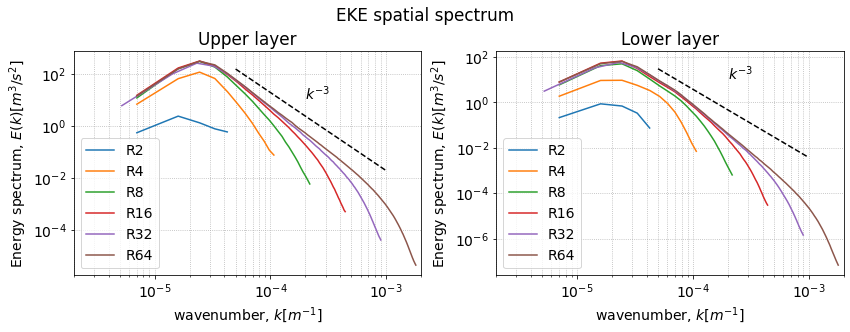

In [275]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3, size=4.5)
ds.plot_KE_spectrum(['R2', 'R4', 'R8', 'R16', 'R32', 'R64'],key='EKE_spectrum', ax=ax);
plt.suptitle('EKE spatial spectrum')

Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R2.nc
Returning cached value of MKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R4.nc
Returning cached value of MKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R8.nc
Returning cached value of MKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R16.nc
Returning cached value of MKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R32.nc
Returning cached value of MKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R64.nc
Returning cached value of MKE_spectrum


Text(0.5, 0.98, 'MKE spatial spectrum')

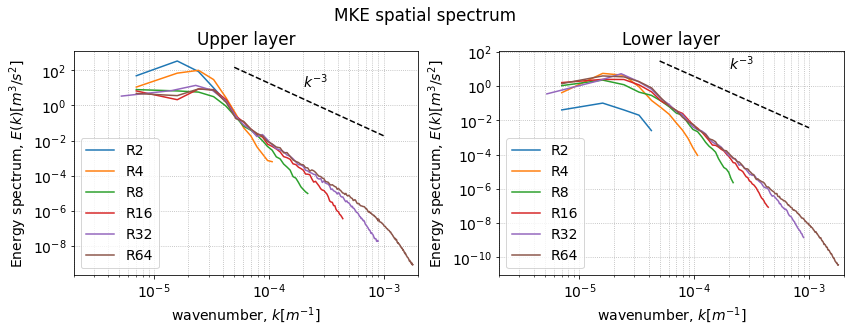

In [276]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3, size=4.5)
ds.plot_KE_spectrum(['R2', 'R4', 'R8', 'R16', 'R32', 'R64'],key='MKE_spectrum', ax=ax);
plt.suptitle('MKE spatial spectrum')

Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_R2.nc
Returning cached value of KE_spectrum_global
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_R4.nc
Returning cached value of KE_spectrum_global
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_R8.nc
Returning cached value of KE_spectrum_global
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_R16.nc
Returning cached value of KE_spectrum_global
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_R32.nc
Returning cached value of KE_spectrum_global
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_R64.nc
Returning cached value of KE_spectrum_global


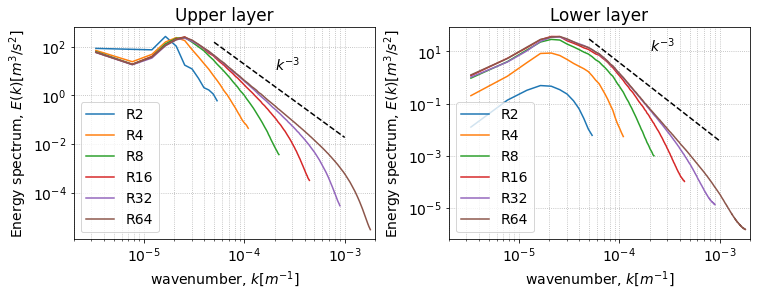

In [278]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_spectrum(['R2', 'R4', 'R8', 'R16', 'R32', 'R64'],key='KE_spectrum_global', ax=ax);

Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R64_R2.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R64_R4.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R64_R8.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R64.nc
Returning cached value of KE_spectrum


Text(0.5, 0.98, 'total KE spatial spectrum')

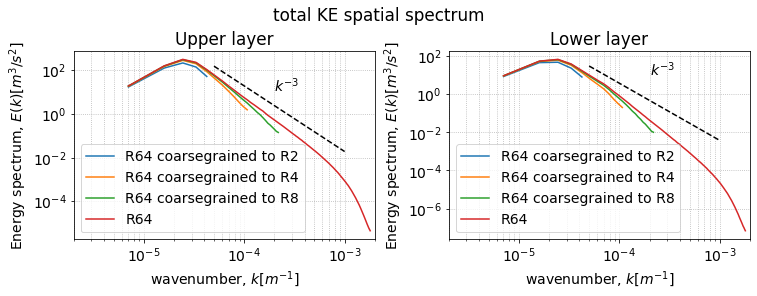

In [185]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_spectrum(['R64_R2', 'R64_R4', 'R64_R8', 'R64'],key='KE_spectrum', ax=ax);
plt.suptitle('total KE spatial spectrum')

Calculating value of EKE_spectrum
Calculating value of u_mean
Saving result to /home/pp2681/ocean-tools/cache/u_mean_R64_R2.nc
Calculating value of v_mean
Saving result to /home/pp2681/ocean-tools/cache/v_mean_R64_R2.nc
Reading file /home/pp2681/ocean-tools/cache/u_mean_R64_R2.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R64_R2.nc
Returning cached value of v_mean
Saving result to /home/pp2681/ocean-tools/cache/EKE_spectrum_R64_R2.nc
Calculating value of EKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/u_mean_R64_R4.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R64_R4.nc
Returning cached value of v_mean
Reading file /home/pp2681/ocean-tools/cache/u_mean_R64_R4.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R64_R4.nc
Returning cached value of v_mean
Saving result to /home/pp2681/ocean-tools/cache/EKE_spectrum_R64_R4.nc
Calculating value of EKE_spectrum
Calcul

Text(0.5, 0.98, 'EKE spatial spectrum')

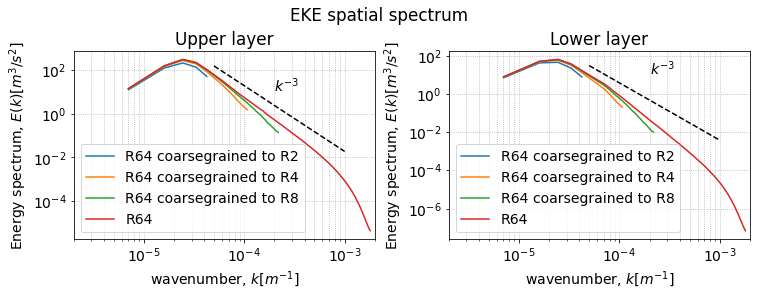

In [186]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_spectrum(['R64_R2', 'R64_R4', 'R64_R8', 'R64'],key='EKE_spectrum', ax=ax);
plt.suptitle('EKE spatial spectrum')

Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R64_R2.nc
Returning cached value of MKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R64_R4.nc
Returning cached value of MKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R64_R8.nc
Returning cached value of MKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R64.nc
Returning cached value of MKE_spectrum


Text(0.5, 0.98, 'MKE spatial spectrum')

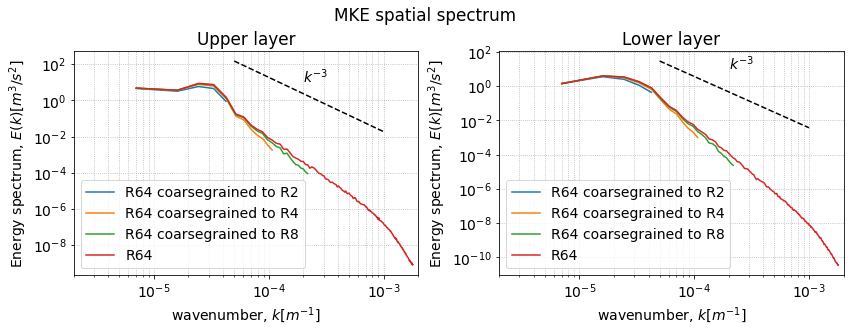

In [189]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3, size=4.5)
ds.plot_KE_spectrum(['R64_R2', 'R64_R4', 'R64_R8', 'R64'],key='MKE_spectrum', ax=ax);
plt.suptitle('MKE spatial spectrum')

Reading file /home/pp2681/ocean-tools/cache/PE_spectrum_R2.nc
Returning cached value of PE_spectrum
Reading file /home/pp2681/ocean-tools/cache/PE_spectrum_R4.nc
Returning cached value of PE_spectrum
Reading file /home/pp2681/ocean-tools/cache/PE_spectrum_R8.nc
Returning cached value of PE_spectrum
Reading file /home/pp2681/ocean-tools/cache/PE_spectrum_R16.nc
Returning cached value of PE_spectrum
Reading file /home/pp2681/ocean-tools/cache/PE_spectrum_R32.nc
Returning cached value of PE_spectrum
Reading file /home/pp2681/ocean-tools/cache/PE_spectrum_R64.nc
Returning cached value of PE_spectrum


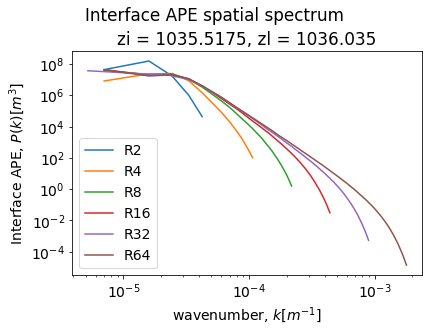

In [428]:
fig, ax = ds.get_axes(nfig=1,ncol=1,ratio=1.3, size=4.5)
for exp in ['R2', 'R4', 'R8', 'R16', 'R32', 'R64']:
    ds[exp].PE_spectrum.plot(label=exp)
plt.suptitle('Interface APE spatial spectrum')
plt.xlabel('wavenumber, $k[m^{-1}]$')
plt.ylabel('Interface APE, $P(k)[m^3]$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

# Spectral time analysis

Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R4.nc
Returning cached value of KE_time_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R8.nc
Returning cached value of KE_time_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R64.nc
Returning cached value of KE_time_spectrum


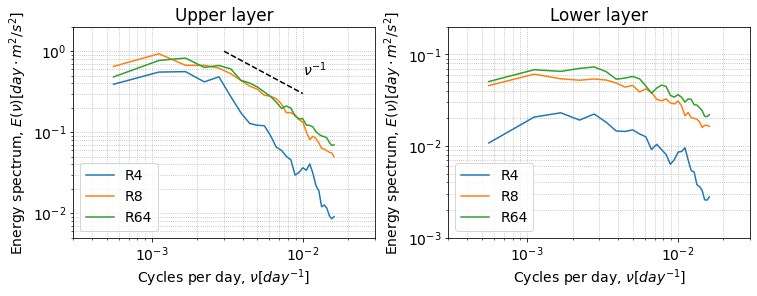

In [170]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_time_spectrum(['R4', 'R8', 'R64'], ax=ax);

Calculating value of KE_time_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_time_spectrum_R4.nc
Calculating value of KE_time_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_time_spectrum_R8.nc
Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R64.nc
Returning cached value of KE_time_spectrum


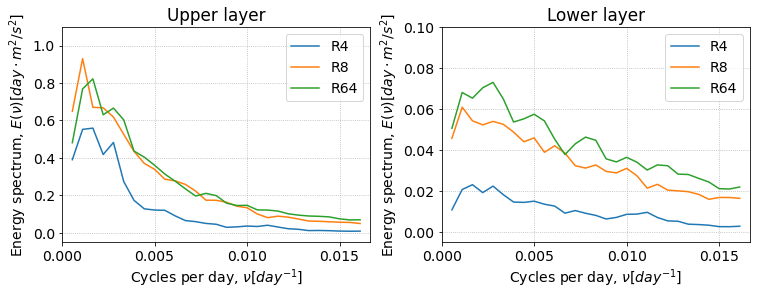

In [169]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3, size=4)
ds.plot_KE_time_spectrum(['R4', 'R8', 'R64'], ax=ax, log=False);

Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R64_R4.nc
Returning cached value of KE_time_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R64_R8.nc
Returning cached value of KE_time_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R64.nc
Returning cached value of KE_time_spectrum


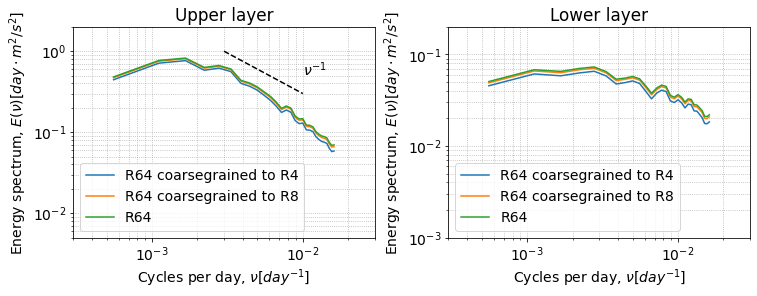

In [168]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_time_spectrum(['R64_R4', 'R64_R8', 'R64'], ax=ax);

# Simple diagnostics

Reading file /home/pp2681/ocean-tools/cache/ssh_mean_R64_R4.nc
Returning cached value of ssh_mean
Reading file /home/pp2681/ocean-tools/cache/ssh_var_R64_R4.nc
Returning cached value of ssh_var


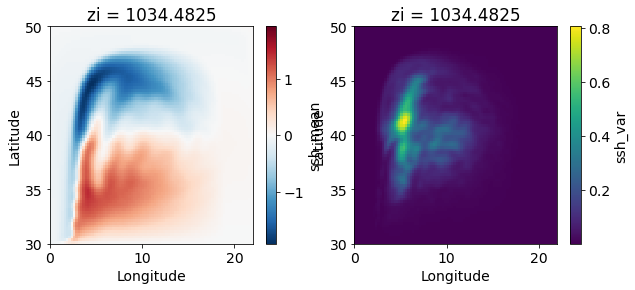

In [166]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ds['R64_R4'].ssh_mean.plot(ax=ax[0])
ds['R64_R4'].ssh_var.plot(ax=ax[1])

Calculating value of ssh_mean
Saving result to /home/pp2681/ocean-tools/cache/ssh_mean_R4.nc
Calculating value of ssh_var
Saving result to /home/pp2681/ocean-tools/cache/ssh_var_R4.nc


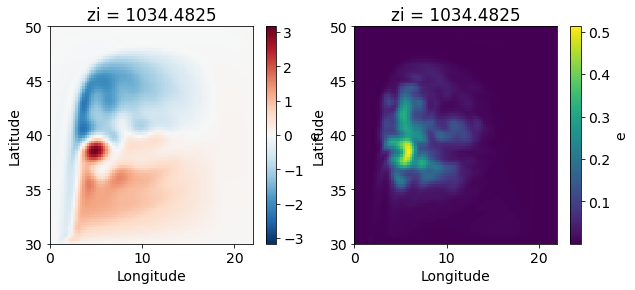

In [164]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ds['R4'].ssh_mean.plot(ax=ax[0])
ds['R4'].ssh_var.plot(ax=ax[1])

Reading file /home/pp2681/ocean-tools/cache/u_mean_R4.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R4.nc
Returning cached value of v_mean


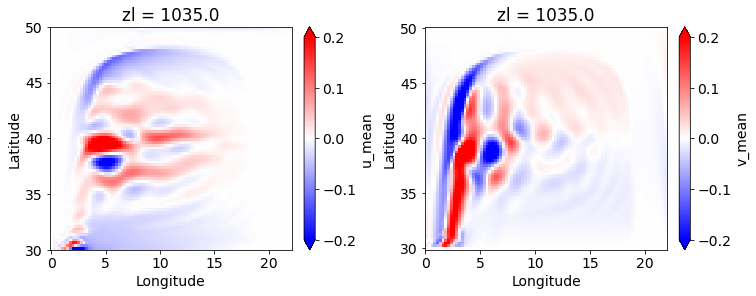

In [163]:
fig, ax = ds.get_axes(nfig=2,ncol=2, ratio=1.3)
ds['R4'].u_mean.isel(zl=0).plot(ax=ax[0],vmin=-0.2, vmax=0.2, cmap='bwr')
ds['R4'].v_mean.isel(zl=0).plot(ax=ax[1],vmin=-0.2, vmax=0.2, cmap='bwr')

Reading file /home/pp2681/ocean-tools/cache/u_mean_R64_R4.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R64_R4.nc
Returning cached value of v_mean


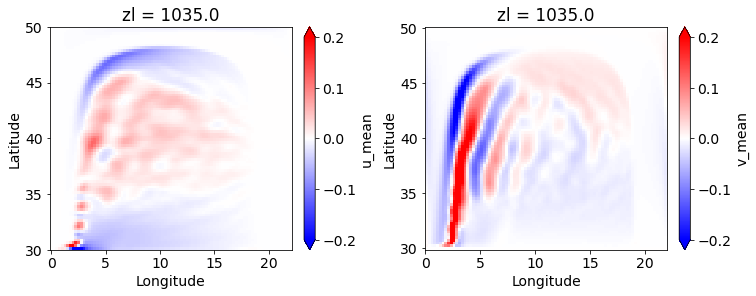

In [162]:
fig, ax = ds.get_axes(nfig=2,ncol=2, ratio=1.3)
ds['R64_R4'].u_mean.isel(zl=0).plot(ax=ax[0],vmin=-0.2, vmax=0.2, cmap='bwr')
ds['R64_R4'].v_mean.isel(zl=0).plot(ax=ax[1],vmin=-0.2, vmax=0.2, cmap='bwr')

Reading file /home/pp2681/ocean-tools/cache/KE_series_R64.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_series_R64_R4.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_series_R4.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_series_R64.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_series_R64_R4.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_series_R4.nc
Returning cached value of KE_series


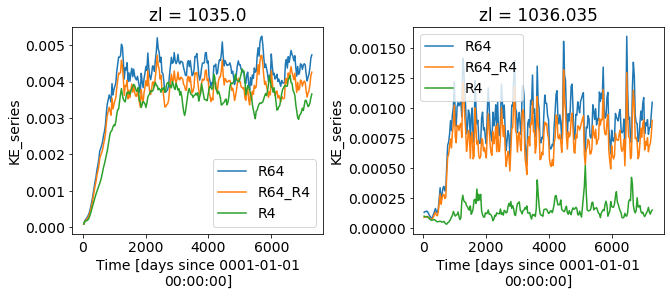

In [161]:
fig, ax = ds.get_axes(nfig=2,ncol=2)
ds['R64'].KE_series.isel(zl=0).plot(ax=ax[0], label='R64')
ds['R64_R4'].KE_series.isel(zl=0).plot(ax=ax[0], label='R64_R4')
ds['R4'].KE_series.isel(zl=0).plot(ax=ax[0], label='R4')
ax[0].legend()
ds['R64'].KE_series.isel(zl=1).plot(ax=ax[1], label='R64')
ds['R64_R4'].KE_series.isel(zl=1).plot(ax=ax[1], label='R64_R4')
ds['R4'].KE_series.isel(zl=1).plot(ax=ax[1], label='R4')
ax[1].legend()

# Mean kineric energy (MKE), Eddy kinetic energy (EKE) and total

Reading file /home/pp2681/ocean-tools/cache/MKE_R64_R4.nc
Returning cached value of MKE
Reading file /home/pp2681/ocean-tools/cache/EKE_R64_R4.nc
Returning cached value of EKE
Reading file /home/pp2681/ocean-tools/cache/KE_total_R64_R4.nc
Returning cached value of KE_total


Text(0.5, 0.98, 'Hires model')

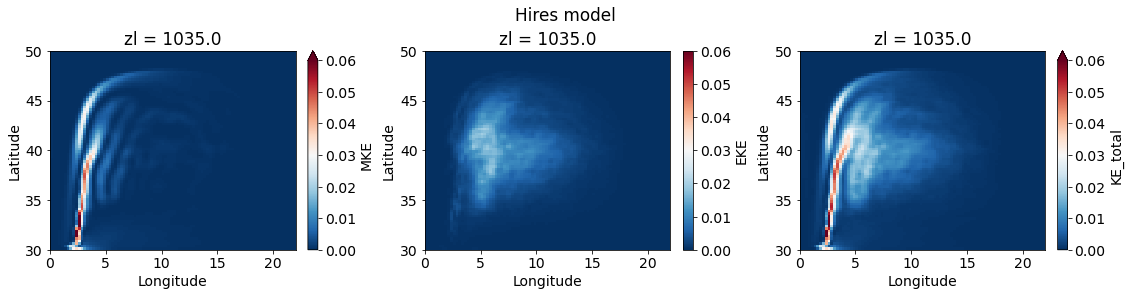

In [211]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
ds['R64_R4'].MKE.isel(zl=0).plot(ax=ax[0], vmin=0, vmax=0.06, cmap='RdBu_r')
ds['R64_R4'].EKE.isel(zl=0).plot(ax=ax[1], vmin=0, vmax=0.06, cmap='RdBu_r')
ds['R64_R4'].KE_total.isel(zl=0).plot(ax=ax[2], vmin=0, vmax=0.06, cmap='RdBu_r')
plt.suptitle('Hires model')

Reading file /home/pp2681/ocean-tools/cache/MKE_R4.nc
Returning cached value of MKE
Reading file /home/pp2681/ocean-tools/cache/EKE_R4.nc
Returning cached value of EKE
Reading file /home/pp2681/ocean-tools/cache/KE_total_R4.nc
Returning cached value of KE_total


Text(0.5, 0.98, 'Lowres model')

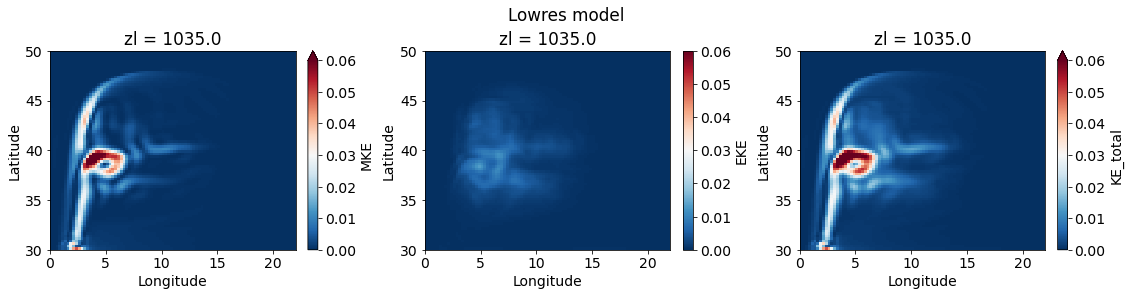

In [212]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
ds['R4'].MKE.isel(zl=0).plot(ax=ax[0], vmin=0, vmax=0.06, cmap='RdBu_r')
ds['R4'].EKE.isel(zl=0).plot(ax=ax[1], vmin=0, vmax=0.06, cmap='RdBu_r')
ds['R4'].KE_total.isel(zl=0).plot(ax=ax[2], vmin=0, vmax=0.06, cmap='RdBu_r')
plt.suptitle('Lowres model')

Reading file /home/pp2681/ocean-tools/cache/MKE_R64_R4.nc
Returning cached value of MKE
Reading file /home/pp2681/ocean-tools/cache/EKE_R64_R4.nc
Returning cached value of EKE
Reading file /home/pp2681/ocean-tools/cache/KE_total_R64_R4.nc
Returning cached value of KE_total


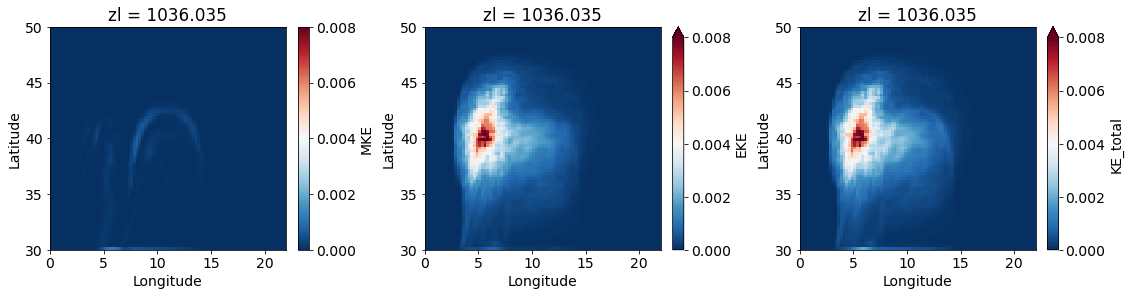

In [213]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
ds['R64_R4'].MKE.isel(zl=1).plot(ax=ax[0], vmin=0, vmax=0.008, cmap='RdBu_r')
ds['R64_R4'].EKE.isel(zl=1).plot(ax=ax[1], vmin=0, vmax=0.008, cmap='RdBu_r')
ds['R64_R4'].KE_total.isel(zl=1).plot(ax=ax[2], vmin=0, vmax=0.008, cmap='RdBu_r')

# Mean potential energy (MPE), Eddy potential energy (EPE), and total potential energy

Reading file /home/pp2681/ocean-tools/cache/e_mean_R64_R4.nc
Returning cached value of e_mean
Reading file /home/pp2681/ocean-tools/cache/h_mean_R64_R4.nc
Returning cached value of h_mean
Reading file /home/pp2681/ocean-tools/cache/e_mean_R64_R4.nc
Returning cached value of e_mean
Reading file /home/pp2681/ocean-tools/cache/h_mean_R64_R4.nc
Returning cached value of h_mean
Reading file /home/pp2681/ocean-tools/cache/e_mean_R64_R4.nc
Returning cached value of e_mean
Reading file /home/pp2681/ocean-tools/cache/h_mean_R64_R4.nc
Returning cached value of h_mean
Reading file /home/pp2681/ocean-tools/cache/e_mean_R64_R4.nc
Returning cached value of e_mean
Reading file /home/pp2681/ocean-tools/cache/h_mean_R64_R4.nc
Returning cached value of h_mean


Text(0.5, 0.98, 'Hires model')

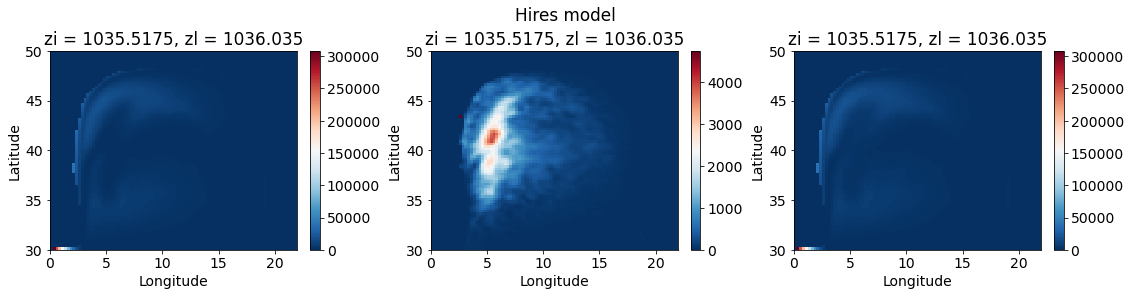

In [418]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
ds['R64_R4'].MPE.plot(ax=ax[0], cmap='RdBu_r')
ds['R64_R4'].EPE.plot(ax=ax[1], cmap='RdBu_r')
ds['R64_R4'].PE_total.plot(ax=ax[2], cmap='RdBu_r')
plt.suptitle('Hires model')

Calculating value of e_mean
Saving result to /home/pp2681/ocean-tools/cache/e_mean_R4.nc
Calculating value of h_mean
Saving result to /home/pp2681/ocean-tools/cache/h_mean_R4.nc
Reading file /home/pp2681/ocean-tools/cache/e_mean_R4.nc
Returning cached value of e_mean
Reading file /home/pp2681/ocean-tools/cache/h_mean_R4.nc
Returning cached value of h_mean
Reading file /home/pp2681/ocean-tools/cache/e_mean_R4.nc
Returning cached value of e_mean
Reading file /home/pp2681/ocean-tools/cache/h_mean_R4.nc
Returning cached value of h_mean
Reading file /home/pp2681/ocean-tools/cache/e_mean_R4.nc
Returning cached value of e_mean
Reading file /home/pp2681/ocean-tools/cache/h_mean_R4.nc
Returning cached value of h_mean


Text(0.5, 0.98, 'Lores model')

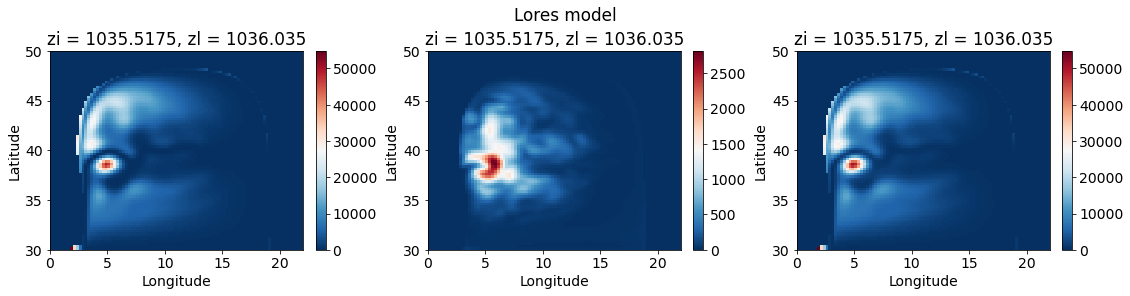

In [419]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
ds['R4'].MPE.plot(ax=ax[0], cmap='RdBu_r')
ds['R4'].EPE.plot(ax=ax[1], cmap='RdBu_r')
ds['R4'].PE_total.plot(ax=ax[2], cmap='RdBu_r')
plt.suptitle('Lores model')

# Difference between old and new definition of EKE

Reading file /home/pp2681/ocean-tools/cache/EKE_R8.nc
Returning cached value of EKE
Reading file /home/pp2681/ocean-tools/cache/MKE_R8.nc
Returning cached value of MKE
0.047538117


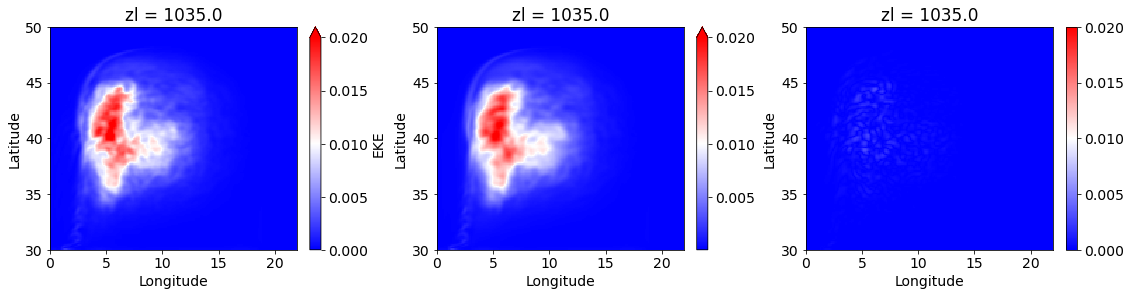

In [155]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
eke1 = ds['R8'].EKE.isel(zl=0)
eke2 = ds['R8'].EKE_old.isel(zl=0)
eke1.plot(ax=ax[0], vmax=0.02, cmap='bwr')
eke2.plot(ax=ax[1], vmax=0.02, cmap='bwr')
error = np.abs(eke1-eke2)
error.plot(ax=ax[2], vmax=0.02, cmap='bwr')
print((error.mean(dim=('xh', 'yh')) / eke1.mean(dim=('xh', 'yh'))).values)

Reading file /home/pp2681/ocean-tools/cache/EKE_R4.nc
Returning cached value of EKE
Reading file /home/pp2681/ocean-tools/cache/MKE_R4.nc
Returning cached value of MKE
0.020803427


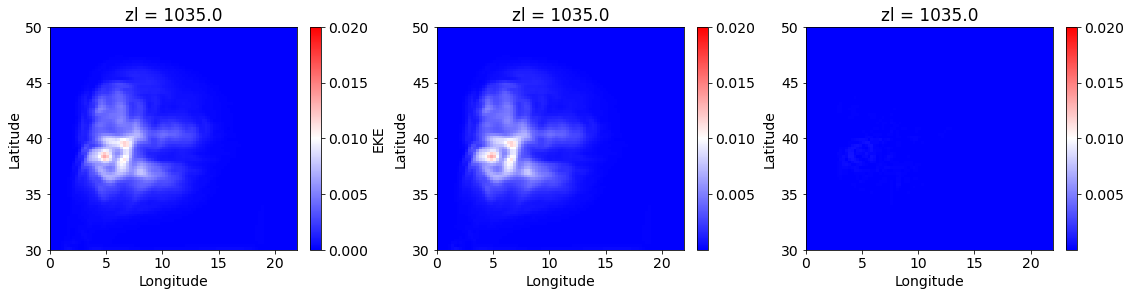

In [153]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
eke1 = ds['R4'].EKE.isel(zl=0)
eke2 = ds['R4'].EKE_old.isel(zl=0)
eke1.plot(ax=ax[0], vmax=0.02, cmap='bwr')
eke2.plot(ax=ax[1], vmax=0.02, cmap='bwr')
error = np.abs(eke1-eke2)
error.plot(ax=ax[2], vmax=0.02, cmap='bwr')
print((error.mean(dim=('xh', 'yh')) / eke1.mean(dim=('xh', 'yh'))).values)

# Energy integrals

Reading file /home/pp2681/ocean-tools/cache/KE_series_R4.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_total_val_R4.nc
Returning cached value of KE_total_val
Reading file /home/pp2681/ocean-tools/cache/EKE_val_R4.nc
Returning cached value of EKE_val
Reading file /home/pp2681/ocean-tools/cache/KE_series_R4.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_total_val_R4.nc
Returning cached value of KE_total_val
Reading file /home/pp2681/ocean-tools/cache/EKE_val_R4.nc
Returning cached value of EKE_val


Text(0.5, 1.0, 'R4 lower layer')

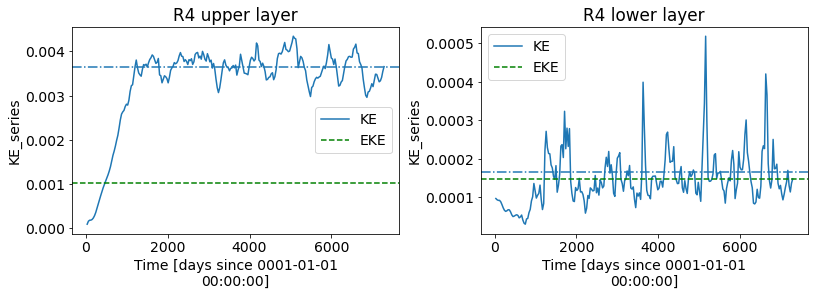

In [149]:
fig, ax = ds.get_axes(nfig=2, ncol=2, ratio=1.4)

ds['R4'].KE_series.isel(zl=0).plot(ax=ax[0], label='KE')
ax[0].axhline(y=ds['R4'].KE_total_val.isel(zl=0), linestyle='-.')
ax[0].axhline(y=ds['R4'].EKE_val.isel(zl=0), linestyle='--', color='g', label='EKE')
ax[0].legend()
ax[0].set_title('R4 upper layer')

ds['R4'].KE_series.isel(zl=1).plot(ax=ax[1], label='KE')
ax[1].axhline(y=ds['R4'].KE_total_val.isel(zl=1), linestyle='-.')
ax[1].axhline(y=ds['R4'].EKE_val.isel(zl=1), linestyle='--', color='g', label='EKE')
ax[1].legend()
ax[1].set_title('R4 lower layer')

Reading file /home/pp2681/ocean-tools/cache/KE_series_R64.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_total_val_R64.nc
Returning cached value of KE_total_val
Reading file /home/pp2681/ocean-tools/cache/EKE_val_R64.nc
Returning cached value of EKE_val
Reading file /home/pp2681/ocean-tools/cache/KE_series_R64.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_total_val_R64.nc
Returning cached value of KE_total_val
Reading file /home/pp2681/ocean-tools/cache/EKE_val_R64.nc
Returning cached value of EKE_val


Text(0.5, 1.0, 'R64 lower layer')

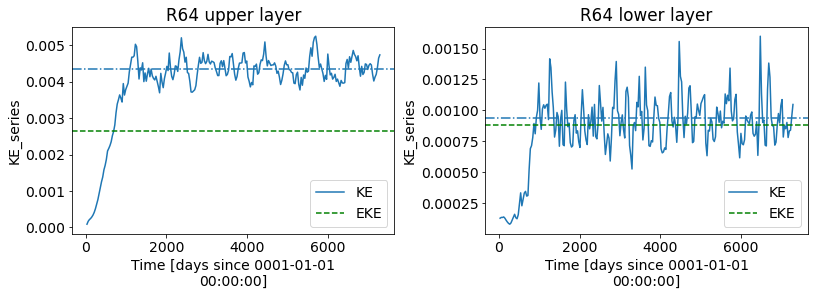

In [147]:
fig, ax = ds.get_axes(nfig=2, ncol=2, ratio=1.4)

ds['R64'].KE_series.isel(zl=0).plot(ax=ax[0], label='KE')
ax[0].axhline(y=ds['R64'].KE_total_val.isel(zl=0), linestyle='-.')
ax[0].axhline(y=ds['R64'].EKE_val.isel(zl=0), linestyle='--', color='g', label='EKE')
ax[0].legend()
ax[0].set_title('R64 upper layer')

ds['R64'].KE_series.isel(zl=1).plot(ax=ax[1], label='KE')
ax[1].axhline(y=ds['R64'].KE_total_val.isel(zl=1), linestyle='-.')
ax[1].axhline(y=ds['R64'].EKE_val.isel(zl=1), linestyle='--', color='g', label='EKE')
ax[1].legend()
ax[1].set_title('R64 lower layer')

Reading file /home/pp2681/ocean-tools/cache/KE_series_R64_R4.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_total_val_R64_R4.nc
Returning cached value of KE_total_val
Reading file /home/pp2681/ocean-tools/cache/EKE_val_R64_R4.nc
Returning cached value of EKE_val
Reading file /home/pp2681/ocean-tools/cache/KE_series_R64_R4.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_total_val_R64_R4.nc
Returning cached value of KE_total_val
Reading file /home/pp2681/ocean-tools/cache/EKE_val_R64_R4.nc
Returning cached value of EKE_val


Text(0.5, 1.0, 'R64_R4 lower layer')

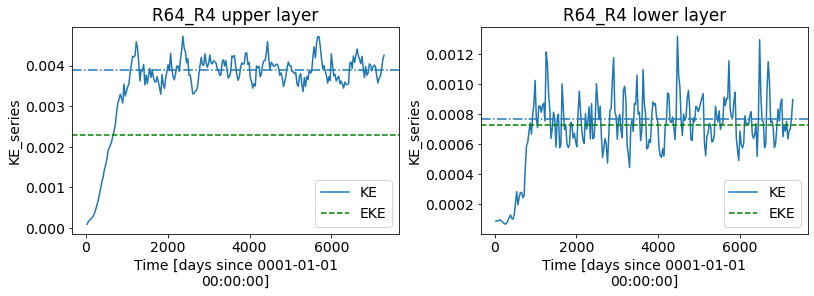

In [145]:
fig, ax = ds.get_axes(nfig=2, ncol=2, ratio=1.4)

ds['R64_R4'].KE_series.isel(zl=0).plot(ax=ax[0], label='KE')
ax[0].axhline(y=ds['R64_R4'].KE_total_val.isel(zl=0), linestyle='-.')
ax[0].axhline(y=ds['R64_R4'].EKE_val.isel(zl=0), linestyle='--', color='g', label='EKE')
ax[0].legend()
ax[0].set_title('R64_R4 upper layer')

ds['R64_R4'].KE_series.isel(zl=1).plot(ax=ax[1], label='KE')
ax[1].axhline(y=ds['R64_R4'].KE_total_val.isel(zl=1), linestyle='-.')
ax[1].axhline(y=ds['R64_R4'].EKE_val.isel(zl=1), linestyle='--', color='g', label='EKE')
ax[1].legend()
ax[1].set_title('R64_R4 lower layer')

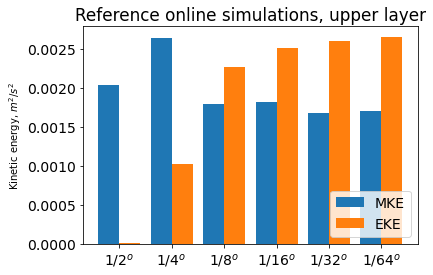

In [717]:
KE = []
MKE = []
EKE = []
exps = ['R2', 'R4', 'R8', 'R16', 'R32', 'R64']
for exp in exps:
    KE.append(ds[exp].KE_total_val.isel(zl=0).values)
    MKE.append(ds[exp].MKE_val.isel(zl=0).values)
    EKE.append(ds[exp].EKE_val.isel(zl=0).values)
x=np.arange(len(exps));
plt.bar(x-0.2,MKE,0.4,label='MKE');
plt.bar(x+0.2,EKE,0.4,label='EKE');
plt.title('Reference online simulations, upper layer');
plt.ylabel('Kinetic energy, $m^2/s^2$', fontsize=10);
plt.xticks(ticks=x,labels=['$1/2^o$','$1/4^o$','$1/8^o$','$1/16^o$','$1/32^o$','$1/64^o$']);
plt.legend(loc='lower right')

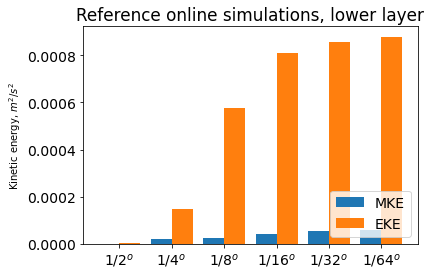

In [718]:
KE = []
MKE = []
EKE = []
exps = ['R2', 'R4', 'R8', 'R16', 'R32', 'R64']
for exp in exps:
    KE.append(ds[exp].KE_total_val.isel(zl=1).values)
    MKE.append(ds[exp].MKE_val.isel(zl=1).values)
    EKE.append(ds[exp].EKE_val.isel(zl=1).values)
x=np.arange(len(exps));
plt.bar(x-0.2,MKE,0.4,label='MKE');
plt.bar(x+0.2,EKE,0.4,label='EKE');
plt.title('Reference online simulations, lower layer');
plt.ylabel('Kinetic energy, $m^2/s^2$', fontsize=10);
plt.xticks(ticks=x,labels=['$1/2^o$','$1/4^o$','$1/8^o$','$1/16^o$','$1/32^o$','$1/64^o$']);
plt.legend(loc='lower right')

# EKE_spectrum error estimation

In [223]:
sp1 = ds['R16'].EKE_spectrum
sp2 = ds['R16'].EKE_spectrum_direct
error = np.abs(sp1-sp2) / np.abs(sp1)
error.max().compute()

Reading file /home/pp2681/ocean-tools/cache/EKE_spectrum_R16.nc
Returning cached value of EKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/u_mean_R16.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R16.nc
Returning cached value of v_mean


<xarray.DataArray ()>
array(0.00897288)

# Getters for main_property and netcdf_property list

In [281]:
from helpers.experiment import Experiment

In [282]:
Experiment.get_list_of_netcdf_propertieprint(ds['R4'].PE_total_val.values)
print(ds['R4'].MPE_val.values)
print(ds['R4'].EPE_val.values)s()

['ssh_mean',
 'ssh_var',
 'u_mean',
 'v_mean',
 'h_mean',
 'KE_spectrum_series',
 'KE_spectrum_global_series',
 'KE_spectrum',
 'KE_spectrum_global',
 'MKE_spectrum',
 'EKE_spectrum',
 'KE_time_spectrum',
 'KE',
 'KE_series',
 'MKE',
 'EKE',
 'KE_total',
 'MKE_val',
 'EKE_val',
 'KE_total_val']

In [283]:
Experiment.get_list_of_main_properties()

['u', 'v', 'e', 'h', 'ua', 'va', 'ea', 'ha']

# EPE, MPE

Reading file /home/pp2681/ocean-tools/cache/PE_Joul_series_R64.nc
Returning cached value of PE_Joul_series


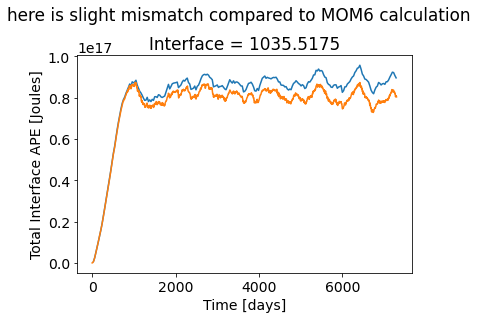

In [437]:
s1 = ds['R64'].PE_Joul_series.plot()
s2 = ds['R64'].series.APE.isel(Interface=1).plot()
plt.suptitle('here is slight mismatch compared to MOM6 calculation', y=1.05);

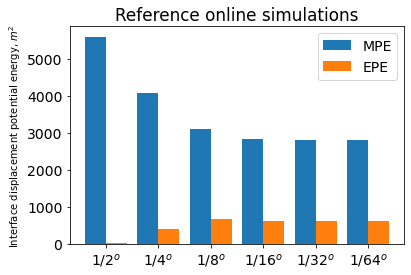

In [704]:
PE = []
MPE = []
EPE = []
exps = ['R2', 'R4', 'R8', 'R16', 'R32', 'R64']
for exp in exps:
    PE.append(ds[exp].PE_total_val.values)
    MPE.append(ds[exp].MPE_val.values)
    EPE.append(ds[exp].EPE_val.values)
x=np.arange(len(exps));
plt.bar(x-0.2,MPE,0.4,label='MPE');
plt.bar(x+0.2,EPE,0.4,label='EPE');
plt.title('Reference online simulations');
plt.ylabel('Interface displacement potential energy, $m^2$', fontsize=10);
plt.xticks(ticks=x,labels=['$1/2^o$','$1/4^o$','$1/8^o$','$1/16^o$','$1/32^o$','$1/64^o$']);
plt.legend()

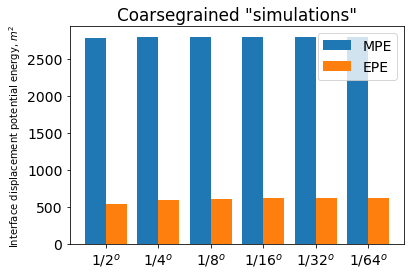

In [703]:
PE = []
MPE = []
EPE = []
exps = ['R64_R2', 'R64_R4', 'R64_R8', 'R64_R16', 'R64_R32', 'R64']
for exp in exps:
    PE.append(float(ds[exp].PE_total_val))
    MPE.append(float(ds[exp].MPE_val))
    EPE.append(float(ds[exp].EPE_val))
x=np.arange(len(exps));
plt.bar(x-0.2,MPE,0.4,label='MPE');
plt.bar(x+0.2,EPE,0.4,label='EPE');
plt.title('Coarsegrained "simulations"');
plt.ylabel('Interface displacement potential energy, $m^2$', fontsize=10);
plt.xticks(ticks=x,labels=['$1/2^o$','$1/4^o$','$1/8^o$','$1/16^o$','$1/32^o$','$1/64^o$']);
plt.legend()

# L1_error for arbitrary fields 3d, 2d, 0d

In [562]:
L1_error(ds['R4'].u_mean,ds['R64_R4'].u_mean)

Reading file /home/pp2681/ocean-tools/cache/u_mean_R4.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/u_mean_R64_R4.nc
Returning cached value of u_mean


[0.86265314, 1.1647519]

In [563]:
L1_error(ds['R8'].u_mean,ds['R64_R8'].u_mean)

Reading file /home/pp2681/ocean-tools/cache/u_mean_R8.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/u_mean_R64_R8.nc
Returning cached value of u_mean


[0.37753332, 0.72835225]

In [564]:
L1_error(ds['R4'].KE_spectrum,ds['R64_R4'].KE_spectrum)

Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R4.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R64_R4.nc
Returning cached value of KE_spectrum


[0.37732033639825696, 0.7555631703103017]

In [565]:
L1_error(ds['R8'].KE_spectrum,ds['R64_R8'].KE_spectrum)

Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R8.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R64_R8.nc
Returning cached value of KE_spectrum


[0.13724906419064548, 0.24863660547800545]

In [592]:
L1_error(ds['R4'].EPE,ds['R64_R4'].EPE)

Reading file /home/pp2681/ocean-tools/cache/EPE_R4.nc
Returning cached value of EPE
Reading file /home/pp2681/ocean-tools/cache/EPE_R64_R4.nc
Returning cached value of EPE


[0.51387703]

In [594]:
L1_error(ds['R8'].EPE,ds['R64_R8'].EPE)

Reading file /home/pp2681/ocean-tools/cache/EPE_R8.nc
Returning cached value of EPE
Reading file /home/pp2681/ocean-tools/cache/EPE_R64_R8.nc
Returning cached value of EPE


[0.31846467]

In [598]:
L1_error(ds['R4'].EPE_val,ds['R64_R4'].EPE_val)

Reading file /home/pp2681/ocean-tools/cache/EPE_val_R4.nc
Returning cached value of EPE_val
Reading file /home/pp2681/ocean-tools/cache/EPE_val_R64_R4.nc
Returning cached value of EPE_val


[0.35459314585850493]

In [599]:
L1_error(ds['R8'].EPE_val,ds['R64_R8'].EPE_val)

Reading file /home/pp2681/ocean-tools/cache/EPE_val_R8.nc
Returning cached value of EPE_val
Reading file /home/pp2681/ocean-tools/cache/EPE_val_R64_R8.nc
Returning cached value of EPE_val


[0.1060943548947374]

In [605]:
L1_error(ds['R4'].ssh_mean,ds['R64_R4'].ssh_mean)

Reading file /home/pp2681/ocean-tools/cache/ssh_mean_R4.nc
Returning cached value of ssh_mean
Reading file /home/pp2681/ocean-tools/cache/ssh_mean_R64_R4.nc
Returning cached value of ssh_mean


[0.31544703]

# L1 error for Experiment

In [719]:
%time l,d = ds['R2'].L1_error(ds['R64_R2'])

CPU times: user 240 ms, sys: 15.6 ms, total: 256 ms
Wall time: 254 ms
